## HOUSE PRICE ANALYSIS AND PREDICTION

This project explores a housing dataset to understand the key factors influencing property values. It includes:

- **Exploratory Data Analysis (EDA):** Summary statistics, feature distributions, and relationship insights between property attributes and value.
- **Linear Regression Modeling:** Building a predictive model to estimate `property_value` using numerical and categorical features like land size, house size, room count, and amenities.

The goal is to uncover patterns and develop a simple regression model to predict house prices based on available features.

## Import Libraries

Begin by importing essential libraries for data analysis and visualization:  
- `pandas` and `numpy` for data manipulation  
- `seaborn` and `matplotlib` for data visualization

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Dataset

The dataset is loaded from a CSV file into a DataFrame. This will allow us to inspect and manipulate the data for our analysis.

In [204]:
df = pd.read_csv('jiffs_house_price_my_dataset_v1.csv')
df

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_or_renovated,water_front,distance_to_supermarket_km,property_value
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,167611
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,186945
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,154628
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,133099
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,158481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,1,1,1,1,2.9,1,20,0,4.1,254547
4950,302,282,4,2,1,1,1,1,3.8,1,12,1,4.8,299788
4951,153,147,3,4,1,1,0,0,3.3,1,7,0,4.7,138088
4952,180,158,2,1,0,1,0,1,2.2,0,1,0,3.4,151907


## Dataset Preview

Let's take a quick look at the dataset using `.head()`, `.tail()`, and `.sample()` to understand its structure and content.

In [205]:
df.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_or_renovated,water_front,distance_to_supermarket_km,property_value
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,167611
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,186945
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,154628
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,133099
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,158481


In [206]:
df.tail()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_or_renovated,water_front,distance_to_supermarket_km,property_value
4949,297,261,4,4,1,1,1,1,2.9,1,20,0,4.1,254547
4950,302,282,4,2,1,1,1,1,3.8,1,12,1,4.8,299788
4951,153,147,3,4,1,1,0,0,3.3,1,7,0,4.7,138088
4952,180,158,2,1,0,1,0,1,2.2,0,1,0,3.4,151907
4953,695,619,8,6,1,1,1,1,0.4,1,5,0,0.4,566249


In [207]:
df.sample(5)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_or_renovated,water_front,distance_to_supermarket_km,property_value
4246,205,182,3,4,1,1,1,0,2.2,1,21,0,5.7,176558
1446,443,420,6,5,1,1,1,1,1.2,1,11,0,2.8,379907
1965,241,218,5,4,1,1,1,1,1.8,1,14,0,3.9,222972
1133,224,220,3,1,0,0,0,0,1.3,1,7,0,5.5,176944
224,289,267,4,4,1,1,1,1,2.9,1,11,0,6.8,263038


## Dataset Information

Using `.info()`, check for data types, missing values, and general structure to guide further preprocessing steps.

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   large_living_room           4954 non-null   int64  
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   int64  
 8   distance_to_school_km       4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age_or_renovated      4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  property_value              4954 

## Check for Missing Values

Identifying missing values helps in deciding whether to fill or drop them during the cleaning process.

In [209]:
df.isna().sum()

land_size_sqm                 0
house_size_sqm                0
no_of_rooms                   0
no_of_bathrooms               0
large_living_room             0
parking_space                 0
front_garden                  0
swimming_pool                 0
distance_to_school_km         0
wall_fence                    0
house_age_or_renovated        0
water_front                   0
distance_to_supermarket_km    0
property_value                0
dtype: int64

## Check for Duplicates

Checking for and removing duplicate entries to ensure data integrity and avoid model distortion.

In [210]:
df.duplicated().sum()

0

## Descriptive Statistics
- What is the mean, median, and standard deviation of property_value?

In [96]:
print(df['property_value'].describe())

count      4954.000000
mean     210846.795317
std       86838.853172
min       68314.000000
25%      148275.500000
50%      204889.500000
75%      253238.500000
max      690144.000000
Name: property_value, dtype: float64


- What is the distribution of land_size_sqm and house_size_sqm?

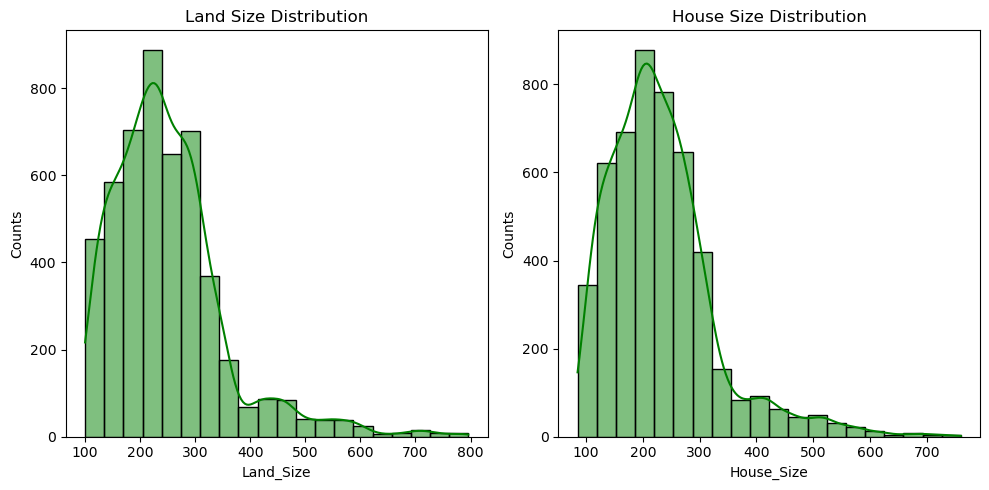

In [97]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.histplot(df['land_size_sqm'], ax = axes [0], kde = True, bins = 20, color ='green')
axes[0].set_title('Land Size Distribution')
axes[0].set_xlabel('Land_Size')
axes[0].set_ylabel('Counts')


sns.histplot(df['house_size_sqm'], ax = axes [1],kde = True, bins = 20, color ='green')
axes[1].set_title('House Size Distribution')
axes[1].set_xlabel('House_Size')
axes[1].set_ylabel('Counts')

plt.tight_layout()
plt.show()

- Which features are skewed?

In [98]:
skewed_features = df.skew().sort_values(ascending=False)
print(skewed_features)

water_front                   4.197359
land_size_sqm                 1.558108
house_size_sqm                1.475725
property_value                1.200021
no_of_bathrooms               0.701086
no_of_rooms                   0.163934
distance_to_school_km         0.026667
distance_to_supermarket_km    0.013200
house_age_or_renovated       -0.002592
swimming_pool                -0.484484
front_garden                 -0.527922
wall_fence                   -0.540460
large_living_room            -1.001717
parking_space                -1.242707
dtype: float64


In [99]:
num_cols = df.select_dtypes(include= ['int64', 'float64']).columns.tolist()

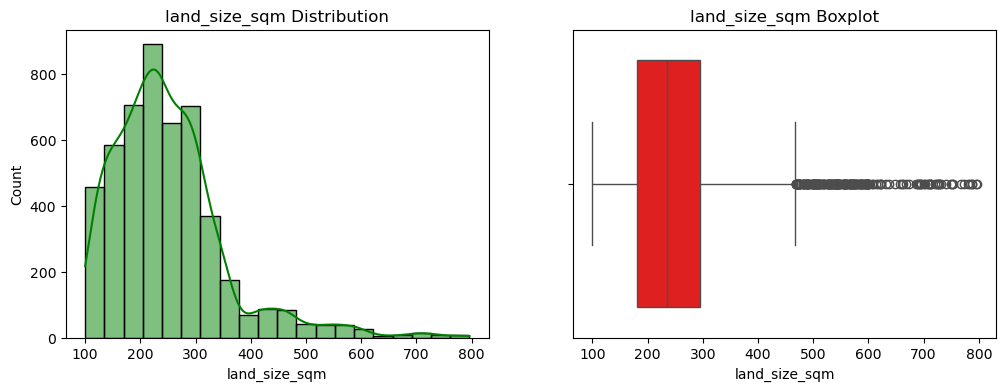

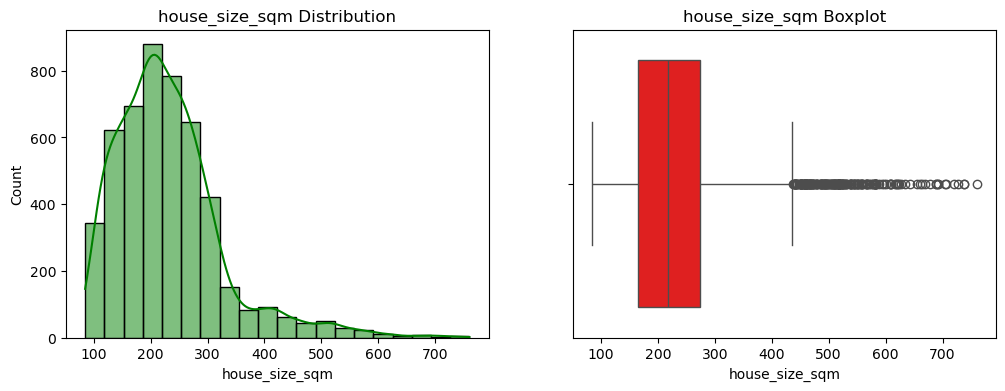

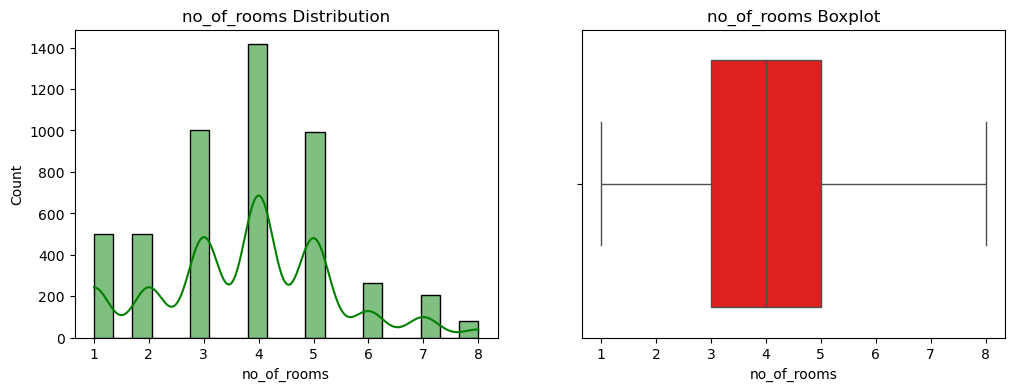

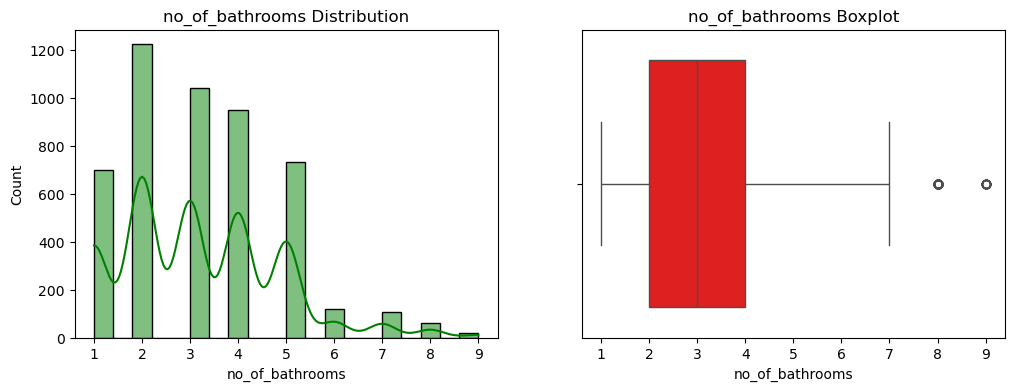

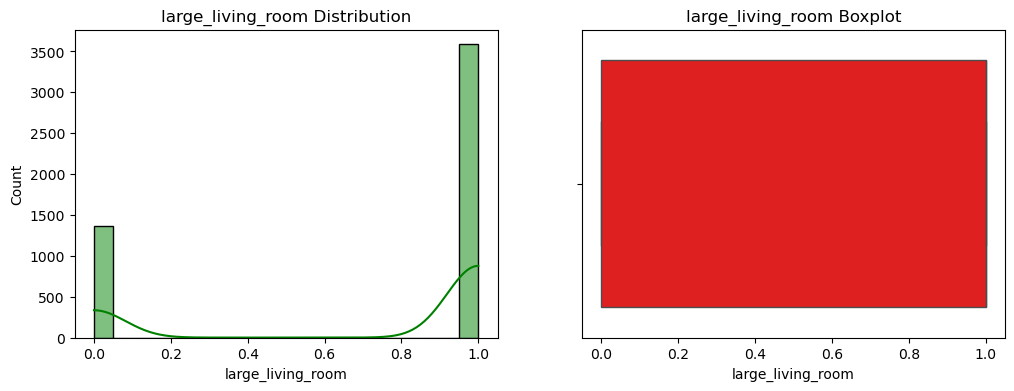

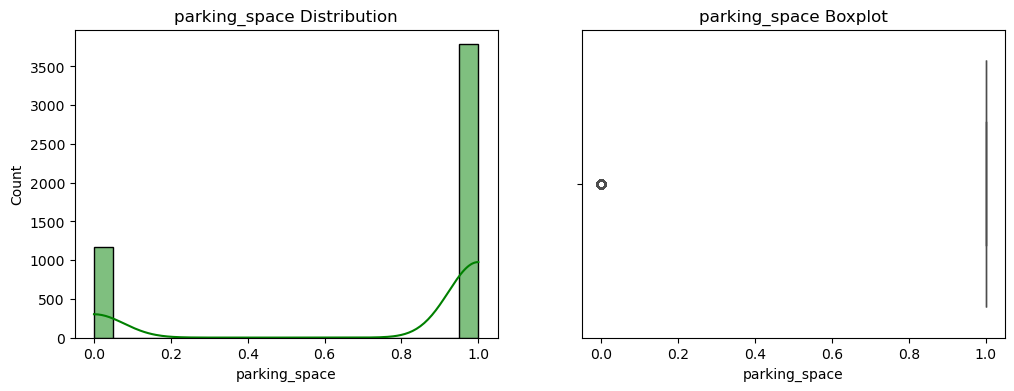

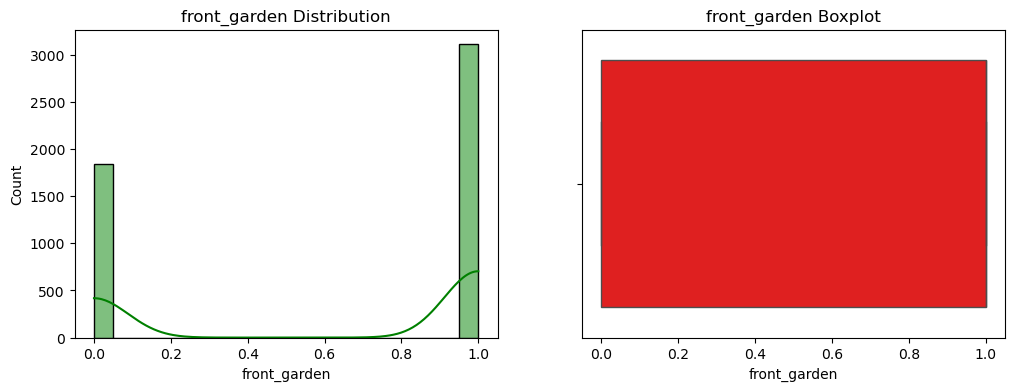

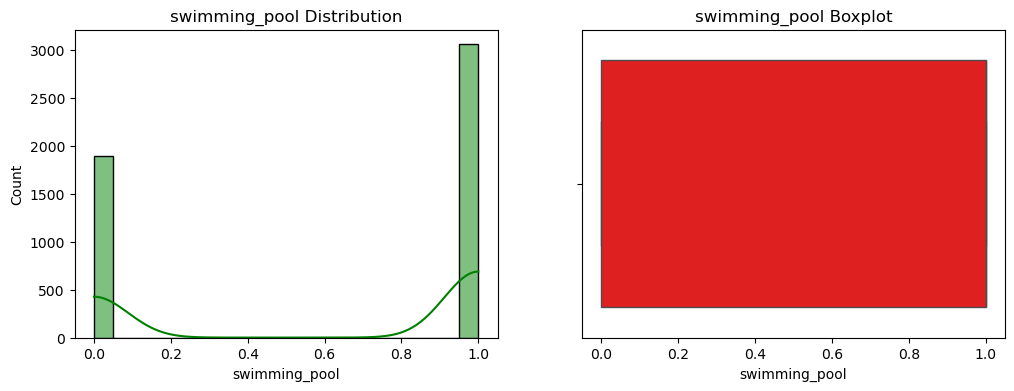

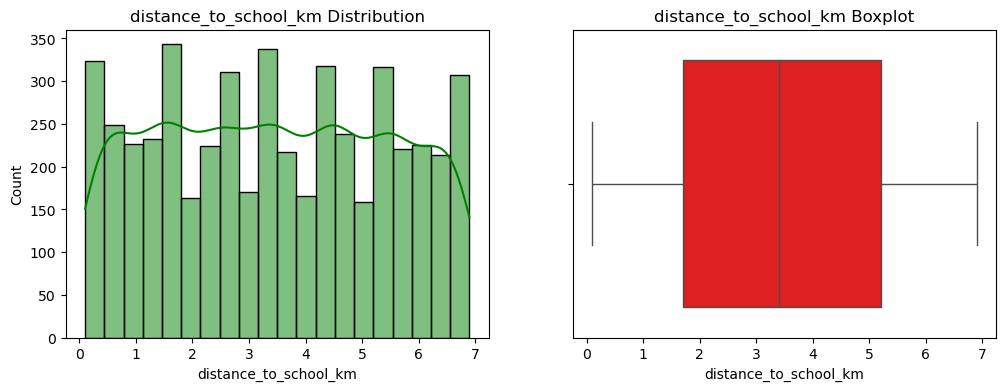

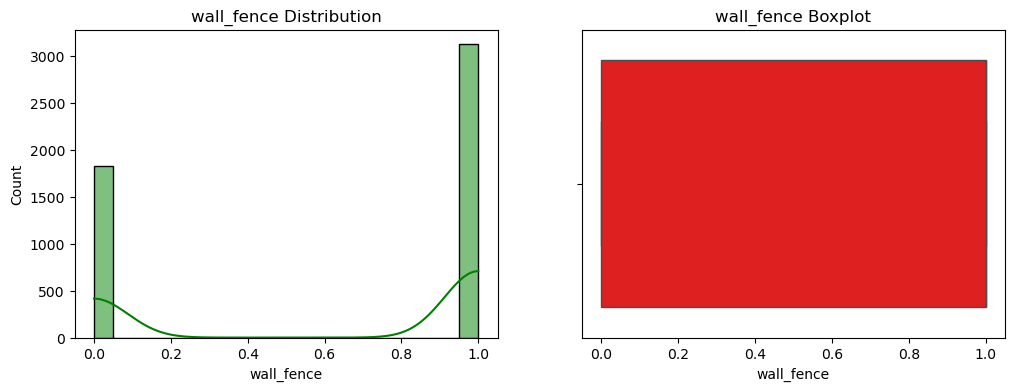

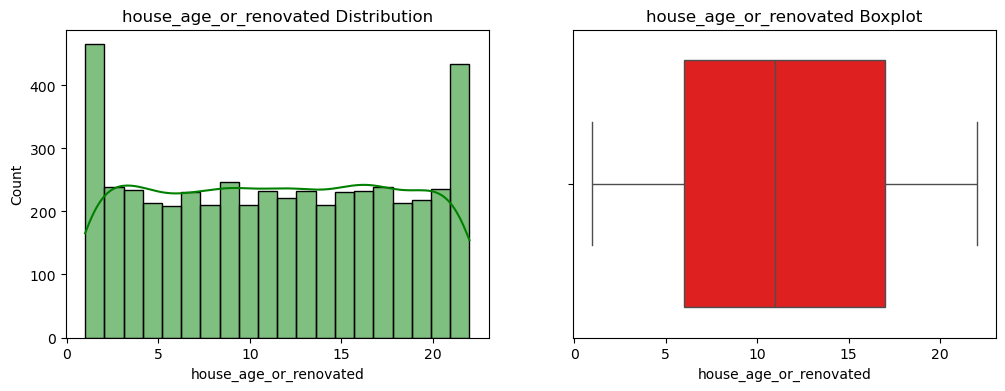

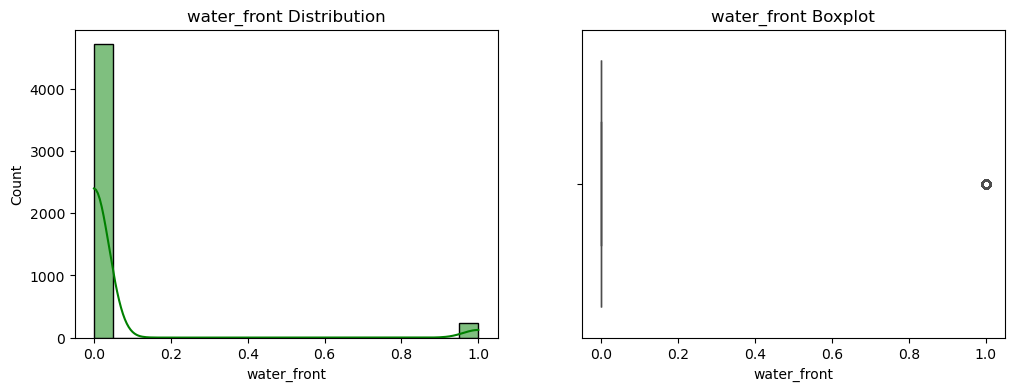

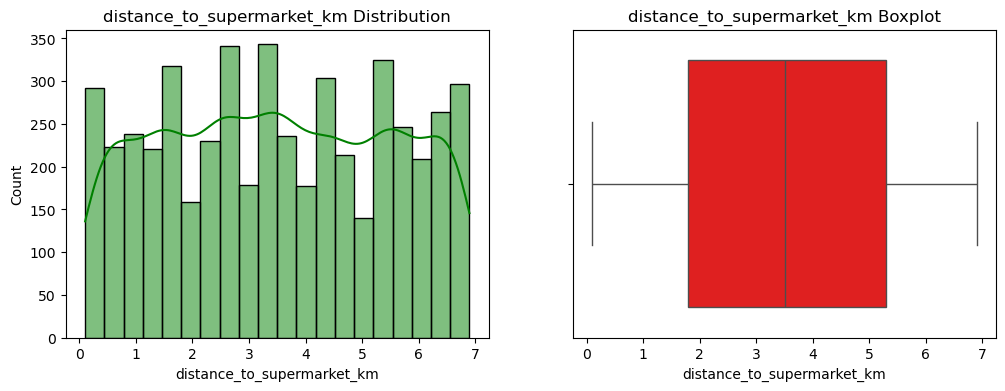

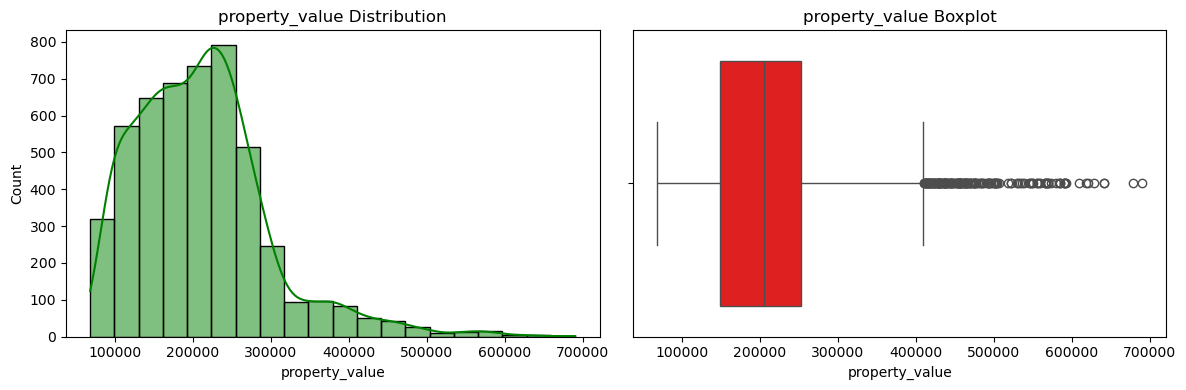

In [100]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, bins=20, color='green', ax=axes[0])
    axes[0].set_title(f'{col} Distribution')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='red', ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')
    axes[1].set_xlabel(col)
    
plt.tight_layout()
plt.show()

## Correlation Matrix

A heatmap of the correlation matrix helps identify multicollinearity between features and the strength of relationships with `property_value`.

In [103]:
corr_matrix = df[num_cols].corr()

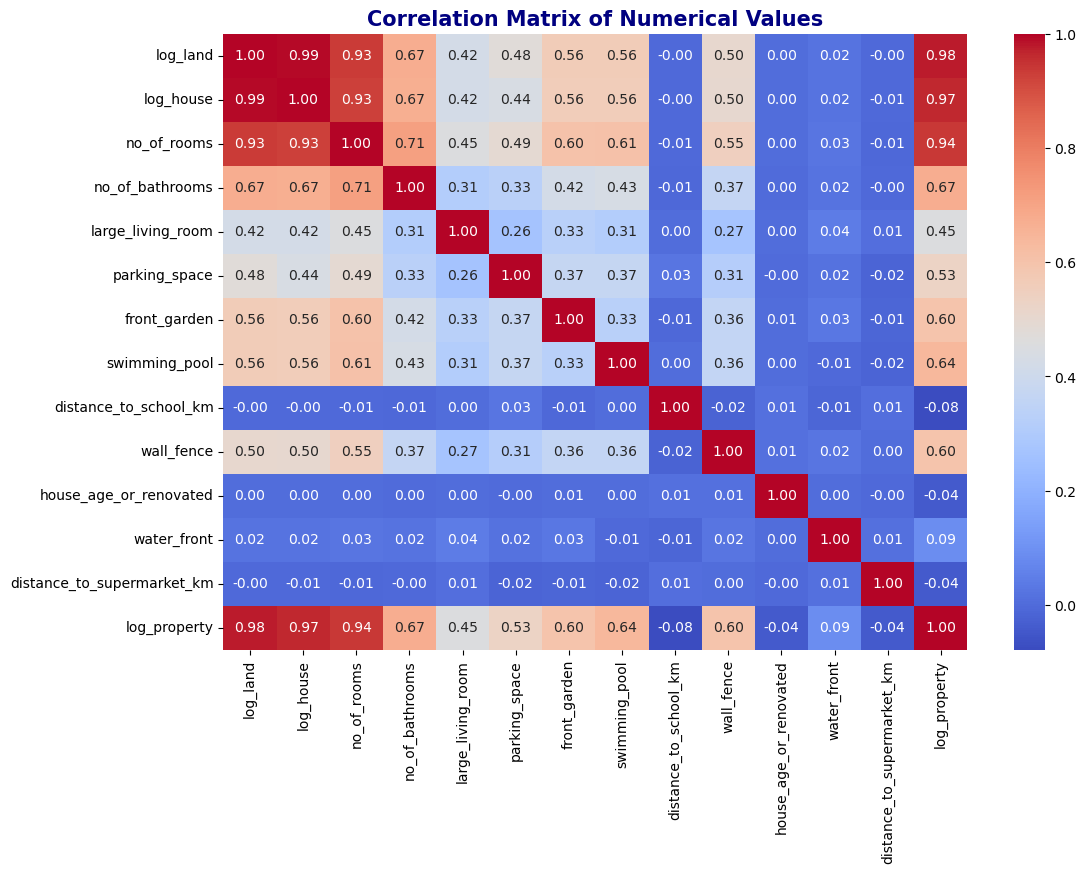

In [213]:
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Values', fontweight = 'bold', fontsize = 15, color = 'navy')
plt.show()

## Log Transformation of Skewed Features

To reduce skewness and improve linear model assumptions, we apply log transformation to `property_value`, `land_size_sqm`, and `house_size_sqm`.

In [211]:
df['log_property'] = np.log(df['property_value'])
df['log_land'] = np.log(df['land_size_sqm'])
df['log_house'] = np.log(df['house_size_sqm'])

log_cols = ['log_property','log_land', 'log_house']

## Visualize Transformed Features

After transformation, reassess the distribution and outliers using histograms and boxplots to confirm improved normality.

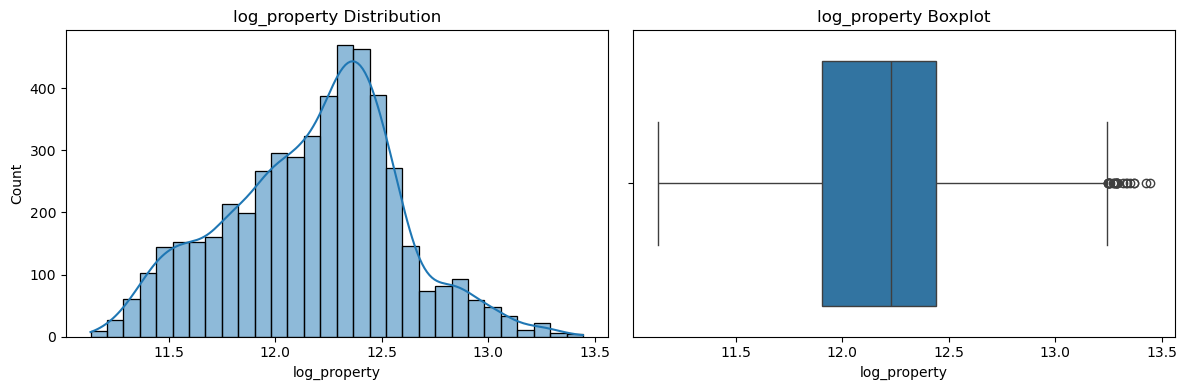

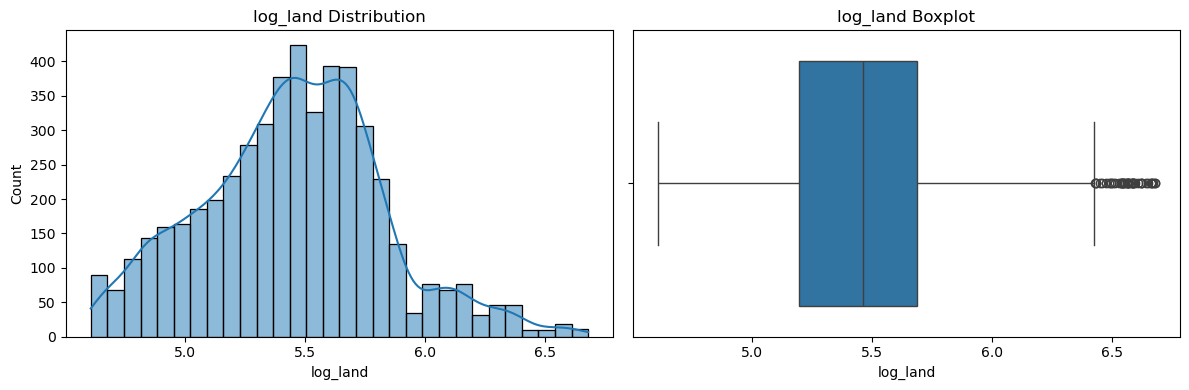

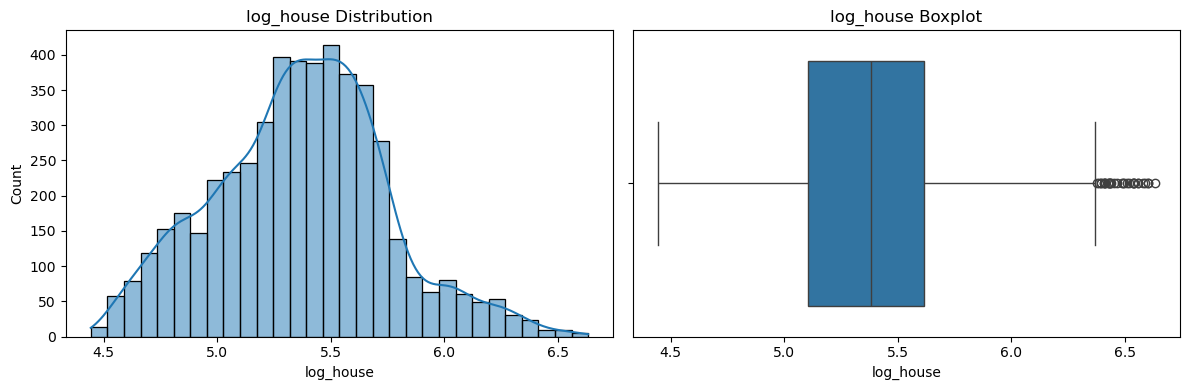

In [214]:
for col in log_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

## Correlation Matrix of Transformed data

Recompute the correlation matrix using transformed variables to check for improved relationships and reduced multicollinearity.

In [215]:
adj_num_cols = ['log_land','log_house','no_of_rooms', 'no_of_bathrooms', 'large_living_room', 'parking_space',
 'front_garden','swimming_pool','distance_to_school_km', 'wall_fence','house_age_or_renovated','water_front', 'distance_to_supermarket_km','log_property']

In [216]:
corr_matrix = df[adj_num_cols].corr()

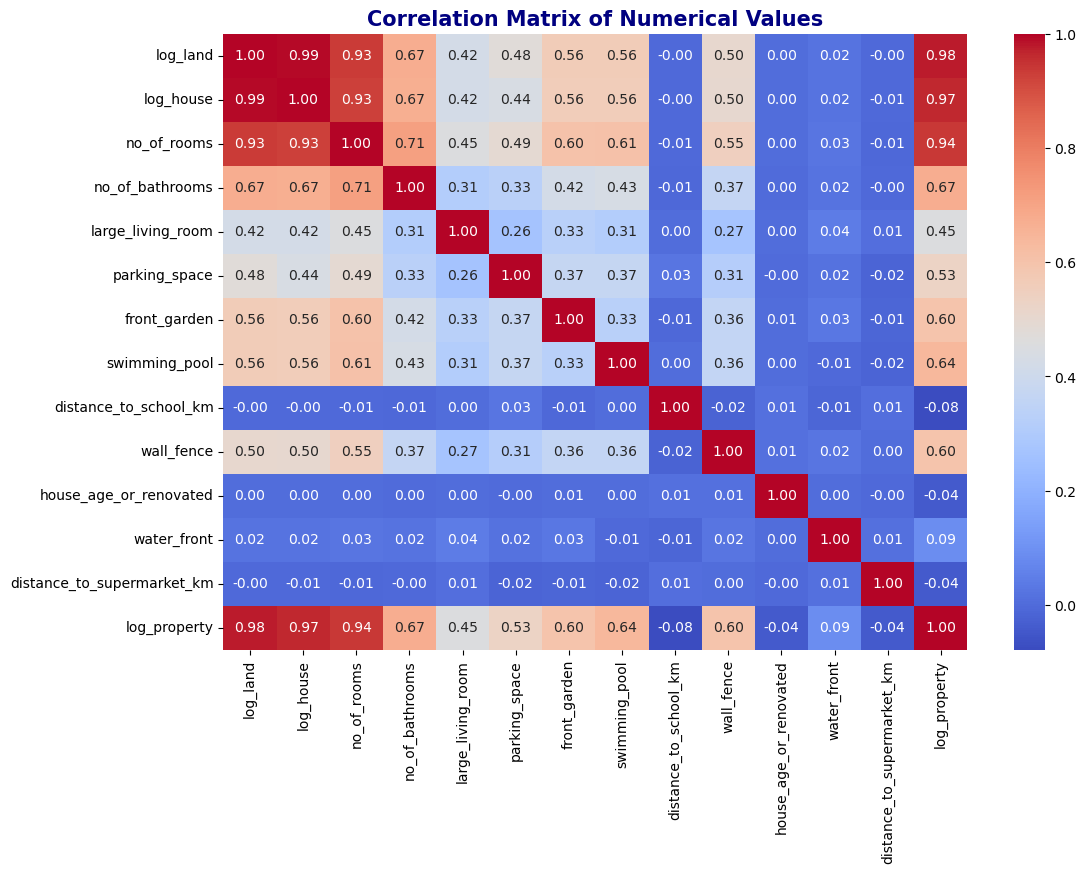

In [217]:
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Values', fontweight = 'bold', fontsize = 15, color = 'navy')
plt.show()

## Binary Feature Analysis

Calculate the percentage of properties that have a swimming pool or are located at the waterfront. These binary indicators could be key drivers of price.

- What percentage of properties have a swimming pool or waterfront?

In [218]:
swimming_pool_percentage = df['swimming_pool'].mean()*100
water_front_percentage = df['water_front'].mean()*100

print(f'Swimming Pool:{swimming_pool_percentage: .2f}%')
print(f'Water Front:{water_front_percentage: .2f}%')

Swimming Pool: 61.77%
Water Front: 4.86%


## Bivariate Analysis - Land Size vs Property Value

Scatter plot to examine the relationship between land size and property value. This helps visually assess if a linear trend exists.

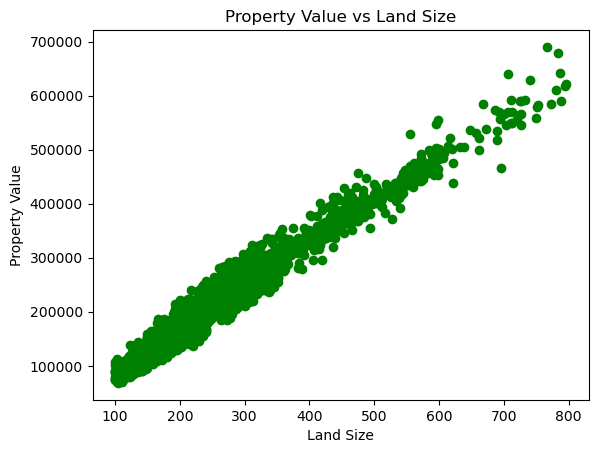

In [219]:
plt.scatter(x = df['land_size_sqm'], y = df['property_value'], color = 'green')
plt.title('Property Value vs Land Size')
plt.xlabel('Land Size')
plt.ylabel('Property Value')
plt.show()

## Bivariate Analysis – House Size vs Property Value

Explore the effect of house size on property value to determine if larger houses correlate with higher prices.

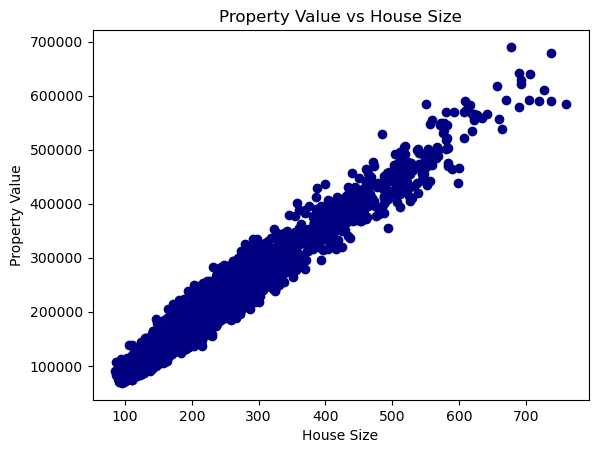

In [220]:
plt.scatter(x = df['house_size_sqm'], y = df['property_value'], color = 'navy')
plt.title('Property Value vs House Size')
plt.xlabel('House Size')
plt.ylabel('Property Value')
plt.show()

## Bivariate Analysis - Number of Rooms vs Property Value

Using boxplots, assess whether properties with more rooms tend to have higher values.

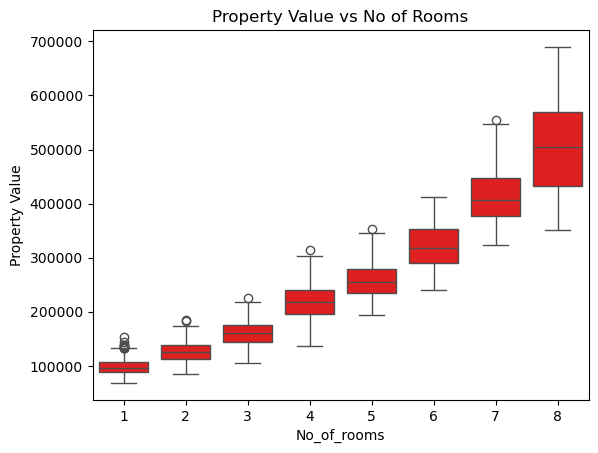

In [221]:
sns.boxplot(x=df['no_of_rooms'], y = df['property_value'], color = 'red')
plt.title('Property Value vs No of Rooms')
plt.xlabel('No_of_rooms')
plt.ylabel('Property Value')
plt.show()

## Bivariate Analysis - Number of Bathrooms vs Property Value

Repeat the process for the number of bathrooms to see if it significantly influences property price.

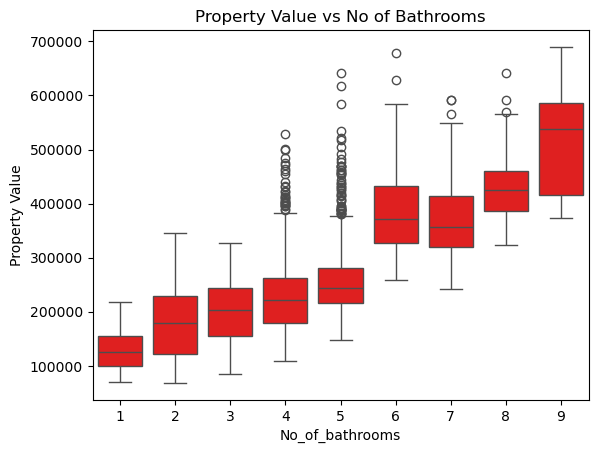

In [222]:
sns.boxplot(x=df['no_of_bathrooms'], y = df['property_value'], color = 'red')
plt.title('Property Value vs No of Bathrooms')
plt.xlabel('No_of_bathrooms')
plt.ylabel('Property Value')
plt.show()

## Bivariate Analysis - Proximity to Schools & Supermarkets

Analyze whether properties closer to schools or supermarkets have higher values by visualizing the relationships.

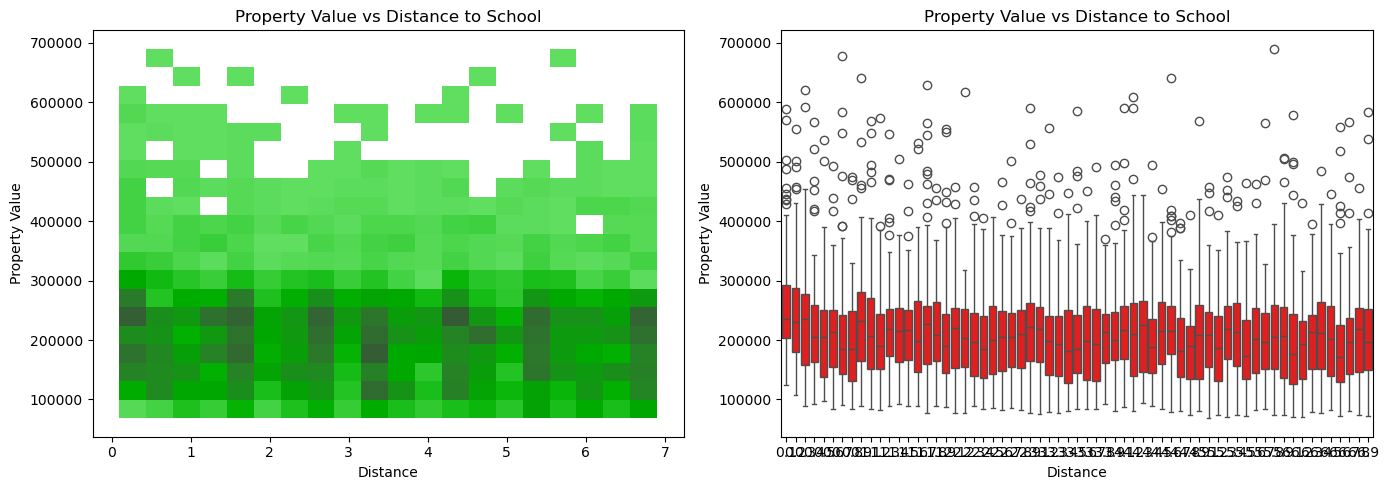

In [223]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(x = df['distance_to_school_km'], y = df['property_value'], bins=20, color='green', ax=axes[0])
axes[0].set_title('Property Value vs Distance to School')
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Property Value')

plt.subplot(1,2,2)
sns.boxplot(x = df['distance_to_school_km'], y = df['property_value'], color='red', ax=axes[1])
axes[1].set_title('Property Value vs Distance to School')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Property Value')
    
plt.tight_layout()
plt.show()

## Data Preparation for Modelling

Select relevant features and define the target variable (`log_property`). Original and untransformed variables like `property_value`, `land_size_sqm`, and `house_size_sqm` are excluded.

In [224]:
features = df.drop(columns = ['property_value', 'log_property', 'land_size_sqm','house_size_sqm']) 
target = df['log_property']

In [225]:
features

,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_or_renovated,water_front,distance_to_supermarket_km,log_land,log_house
0,3,1,0,1,1,0,3.3,1,10,0,6.8,5.303305,5.176150
1,4,3,1,1,0,1,1.2,1,11,0,4.1,5.278115,5.204007
2,4,4,1,1,0,1,5.9,0,20,0,2.1,5.288267,5.204007
3,2,3,0,1,0,0,5.9,0,5,0,0.7,5.181784,5.111988
4,3,1,1,1,0,0,3.8,1,8,0,0.7,5.209486,5.105945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,4,4,1,1,1,1,2.9,1,20,0,4.1,5.693732,5.564520
4950,4,2,1,1,1,1,3.8,1,12,1,4.8,5.710427,5.641907
4951,3,4,1,1,0,0,3.3,1,7,0,4.7,5.030438,4.990433
4952,2,1,0,1,0,1,2.2,0,1,0,3.4,5.192957,5.062595


In [226]:
target

0       12.029401
1       12.138570
2       11.948778
3       11.798848
4       11.973390
          ...    
4949    12.447241
4950    12.610831
4951    11.835646
4952    11.931024
4953    13.246789
Name: log_property, Length: 4954, dtype: float64

In [227]:
features.shape

(4954, 13)

In [228]:
target.shape

(4954,)

## Splitting the Dataset

The dataset is split into training and testing sets using an 80-20 ratio to ensure fair model evaluation on unseen data.

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
train_features, test_features, train_target, test_target = train_test_split(features, target, 
                                                                            test_size = 0.2, random_state = 20)

In [231]:
train_features.shape, test_features.shape

((3963, 13), (991, 13))

In [232]:
train_features.head()

,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_or_renovated,water_front,distance_to_supermarket_km,log_land,log_house
819,5,4,1,1,1,1,1.6,1,9,0,5.2,5.883322,5.749393
4795,4,3,1,1,1,1,4.5,1,9,0,2.3,5.693732,5.676754
3542,3,1,0,0,1,0,4.1,0,10,0,6.3,5.056246,5.049856
3964,6,4,1,1,1,1,1.4,1,6,0,2.7,5.843544,5.831882
4719,1,1,0,0,0,0,4.1,0,4,0,2.8,4.890349,4.836282


## Feature Scaling and Encoding

Scale the numerical features using `StandardScaler` to normalize the range of the values, which is important for many models.  

In [233]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [234]:
num_cols = ['log_land',
 'log_house',
 'no_of_rooms',
 'no_of_bathrooms',
 'large_living_room',
 'parking_space',
 'front_garden',
 'swimming_pool',
 'distance_to_school_km',
 'wall_fence',
 'house_age_or_renovated',
 'water_front',
 'distance_to_supermarket_km']

In [235]:
num_cols

['log_land',
 'log_house',
 'no_of_rooms',
 'no_of_bathrooms',
 'large_living_room',
 'parking_space',
 'front_garden',
 'swimming_pool',
 'distance_to_school_km',
 'wall_fence',
 'house_age_or_renovated',
 'water_front',
 'distance_to_supermarket_km']

In [236]:
encoder = OneHotEncoder()

In [237]:
scaler = StandardScaler()

In [238]:
train_num = scaler.fit_transform(train_features[num_cols])
test_num = scaler.transform(test_features[num_cols])

In [239]:
test_num

array([[ 0.43202469,  0.36479982,  0.13925656, ..., -1.48348469,
        -0.22932431, -0.06054768],
       [ 0.15893305,  0.32170861,  0.13925656, ..., -1.17023609,
        -0.22932431, -1.11959766],
       [ 0.354031  ,  0.39666087,  0.13925656, ...,  0.08275834,
        -0.22932431, -0.11097863],
       ...,
       [-0.85679992, -0.81562419, -0.49362617, ...,  1.02250416,
        -0.22932431,  1.6036737 ],
       [-1.47355409, -1.33195033, -1.75939164, ...,  1.49237706,
        -0.22932431,  0.14117612],
       [-0.30641606, -0.35599645,  0.13925656, ...,  1.02250416,
        -0.22932431, -0.6657191 ]])

In [240]:
train_num

array([[ 1.15015531,  1.00631651,  0.77213929, ..., -0.38711457,
        -0.22932431,  0.84720944],
       [ 0.65298435,  0.81538407,  0.13925656, ..., -0.38711457,
        -0.22932431, -0.61528814],
       [-1.01872447, -0.8324198 , -0.49362617, ..., -0.23049027,
        -0.22932431,  1.4019499 ],
       ...,
       [-0.60258474, -0.50045614, -1.12650891, ..., -0.07386597,
        -0.22932431,  1.65410465],
       [-0.70429506, -0.84932343, -1.12650891, ..., -1.01361178,
        -0.22932431,  1.04893324],
       [ 0.59043824,  0.38608337,  0.77213929, ...,  1.17912846,
        -0.22932431,  0.49419278]])

## Prepare Data for Modeling

After transformation, the scaled feature arrays are stored in `train_processed` and `test_processed`, ready for training the regression model.

In [241]:
train_processed = train_num
test_processed = test_num

## Train a Linear Regression Model

Instantiate and train a `LinearRegression` model on the processed training data to learn the relationship between features and log-transformed property values.

In [242]:
from sklearn.linear_model import LinearRegression

In [243]:
model = LinearRegression()

In [244]:
model.fit(train_processed, train_target)

LinearRegression()

## Predict on Train and Test Sets

Once trained, generate predictions on both training and test sets to evaluate the model’s performance on seen and unseen data.

In [245]:
train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

In [246]:
train_pred

array([12.66557098, 12.47127975, 11.65684325, ..., 11.86334501,
       11.73185552, 12.41998042])

In [247]:
train_target

819     12.659010
4795    12.476409
3542    11.569674
3964    12.626114
4719    11.507913
          ...    
1607    12.578835
3915    11.456916
1428    11.924280
4367    11.702926
2522    12.401454
Name: log_property, Length: 3963, dtype: float64

## Compute Mean Squared Error (MSE)

The Mean Squared Error quantifies the average squared difference between predicted and actual values for both training and test datasets.

In [249]:
from sklearn.metrics import mean_squared_error, r2_score

In [250]:
train_mse = mean_squared_error(train_target, train_pred)
test_mse = mean_squared_error(test_target, test_pred)

In [251]:
train_mse, test_mse

(0.0009628528874386558, 0.0009068965894367644)

## Evaluate Model with R² Score

The R² score (coefficient of determination) indicates how well the model explains the variance in the target variable.  
- R² close to 1.0 suggests a strong model.
- Compare both train and test R² to detect overfitting or underfitting.

In [252]:
train_score = r2_score(train_target, train_pred)
test_score = r2_score (test_target, test_pred)

In [253]:
train_score, test_score

(0.9941121800496782, 0.9943603884575593)

In [254]:
train_target

819     12.659010
4795    12.476409
3542    11.569674
3964    12.626114
4719    11.507913
          ...    
1607    12.578835
3915    11.456916
1428    11.924280
4367    11.702926
2522    12.401454
Name: log_property, Length: 3963, dtype: float64

In [255]:
train_pred

array([12.66557098, 12.47127975, 11.65684325, ..., 11.86334501,
       11.73185552, 12.41998042])

## Construct Prediction Table

Create a table to compare actual values, predicted values, and the error for a subset of the training data. This helps inspect model accuracy.

In [258]:
error = train_target - train_pred

In [259]:
prediction_table = pd.DataFrame({
                    'Actual': train_target,
                    'Predicted': train_pred,
                    'Error': error
})

In [260]:
prediction_table.sample(5)

,Actual,Predicted,Error
4740,12.833942,12.801679,0.032263
3417,12.287422,12.278802,0.008621
2983,12.307862,12.293747,0.014115
1254,12.139564,12.116103,0.023461
2821,12.433515,12.451963,-0.018448


## Analyze Prediction Error

Calculate the mean of the prediction error to assess bias. A mean close to zero indicates the model does not systematically under- or over-predict.

In [261]:
prediction_table['Error'].mean()

-1.0018060903506332e-15

## Final Evaluation with MAE and MSE

Compute:
- **Mean Absolute Error (MAE):** The average absolute difference between actual and predicted values.
- **Mean Squared Error (MSE):** A more penalizing metric for larger errors.

Both metrics help quantify the overall predictive performance.

In [262]:
from sklearn.metrics import mean_absolute_error

In [263]:
mean_absolute_error(train_target, train_pred)

0.02398161791902769

In [264]:
from sklearn.metrics import mean_squared_error

In [265]:
mean_squared_error(train_target, train_pred)

0.0009628528874386558

In [266]:
np.sqrt(mean_squared_error(train_target, train_pred))

0.031029870889816086

In [267]:
from sklearn.metrics import r2_score

In [190]:
r2_score(train_target, train_pred)

0.9941121800496782

In [191]:
n = train_target.shape[0]
k = df.shape[1] - 1

In [192]:
r = r2_score(train_target, train_pred)

In [193]:
adj = 1 - ((1 -r) * (n - 1)) / (n-k-1)

In [194]:
adj

0.9940883064766409

## Conclusion

This project demonstrated a comprehensive approach to understanding the key drivers of house prices using exploratory data analysis, feature engineering, and linear regression modeling.

Key insights:
- **Land size** and **house size** are strong predictors of property value.
- Binary features like **swimming pool** and **waterfront location** significantly impact prices.
- Log transformation improved the normality of skewed features, enhancing model stability.
- The model achieved a high R² score (e.g., ~0.99 on training data), suggesting strong explanatory power.
- **Mean Absolute Error (MAE)** and **Mean Squared Error (MSE)** were reasonable, though further validation is needed to ensure generalizability.